<hr style="height:3px;border:none;color:#333;background-color:#333;" />
<img style=" float:right; display:inline" src=https://upload.wikimedia.org/wikipedia/en/7/74/TensorFlow.png width="150" height="150" />

### ** Convolutional Neural Network (CNN) on Cifar-10 ** 
<br/>
<br/>
<span style="color:#000; font-family: 'Bebas Neue'; font-size: 2.0em;"> **TensorFlow Hands-on Tutorial** </span>

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<span style="color:#000; font-family: 'Bebas Neue'; font-size: 2em;"> **Outline** </span>  
<br/>
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> Clues in TensorFlow </span>  
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> First Model in TensorFlow
 </span>  
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.4em;"> **Convolutional Neural Network (CNN) on Cifar-10**
 </span>  
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> Techniques for Deep Learning in TensorFlow </span>
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> Inception V3 </span>
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> CNN for Text Classification </span>
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> Hidden Markov Model in TensorFlow </span>
- <span style="color:#000; font-family: 'Bebas Neue'; font-size: 1.2em;"> Image Captioning in TensorFlow </span>
<br/>
<br/>

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from stl10_input import *

## from tensorflow.examples.tutorials.mnist import input_data
## from tensorflow.models.image.cifar10 import cifar10

In [2]:
X_train = read_all_images("./data/stl10_binary/train_X.bin")/255.
y_train = read_labels("./data/stl10_binary/train_y.bin")

#X_train = X_train.reshape((5000,27648))

b = np.zeros((y_train.shape[0], 10))
b[np.arange(y_train.shape[0]), y_train-1] = 1
y_train = b


X_test = read_all_images("./data/stl10_binary/test_X.bin")/255.
y_test = read_labels("./data/stl10_binary/test_y.bin")

#X_test = x_test.reshape(8000,27648)

b = np.zeros((y_test.shape[0], 10))
b[np.arange(y_test.shape[0]), y_test-1] = 1
y_test = b

print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(5000, 96, 96, 3)
(5000, 10)
(8000, 96, 96, 3)
(8000, 10)


In [3]:
def getBatch(n):
    indexes = np.random.randint(0,X_train.shape[0],size=(n))
    return X_train[indexes], y_train[indexes]

In [9]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.01)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', use_cudnn_on_gpu = None)

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

## Phase I: Construction Phase

In [5]:
x = tf.placeholder(tf.float32,[None, 96,96,3])

h = tf.placeholder(tf.float32,[1, 48, 48,40])

sty = tf.placeholder(tf.float32, [1, 96, 96,3])

y_ = tf.placeholder(tf.float32, [None, 10])

x_image = x

W_conv1 = weight_variable([3, 3, 3, 40])
b_conv1 = bias_variable([40])

W_conv2 = weight_variable([3, 3, 40, 40])
b_conv2 = bias_variable([40])

W_fc1 = weight_variable([24 * 24 * 40, 500])
b_fc1 = bias_variable([500])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
h_pool2_flat = tf.reshape(h_pool2, [-1, 24*24*40])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 = weight_variable([500, 10])
b_fc2 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

sh_conv1 = tf.nn.relu(conv2d(sty, W_conv1) + b_conv1)
sh_pool1 = max_pool_2x2(sh_conv1)
sh_conv2 = tf.nn.relu(conv2d(sh_pool1, W_conv2) + b_conv2)
sh_pool2 = max_pool_2x2(sh_conv2)

stemp = tf.reshape(sh_conv1, [96*96,40])
ssty = tf.matmul(tf.transpose(stemp), stemp)

stemp2 = tf.reshape(sh_conv2, [48*48,40])
ssty2 = tf.matmul(tf.transpose(stemp2), stemp2)

r = tf.Variable(tf.random_normal([1, 96,96,3], stddev=0.01))
rh_conv1 = tf.nn.relu(conv2d(r, W_conv1) + b_conv1)
rh_pool1 = max_pool_2x2(rh_conv1)
rh_conv2 = tf.nn.relu(conv2d(rh_pool1, W_conv2) + b_conv2)
rh_pool2 = max_pool_2x2(rh_conv2)
temp = tf.reshape(rh_conv1, [96*96,40])
rsty = tf.matmul(tf.transpose(temp), temp)

temp2 = tf.reshape(rh_conv2, [48*48,40])
rsty2 = tf.matmul(tf.transpose(temp2), temp2)

rareLoss = tf.reduce_mean(tf.square(rh_conv2 - h)) + 0.01*tf.reduce_mean(tf.square(rsty - ssty))
+ 0.01*tf.reduce_mean(tf.square(rsty2 - ssty2))
rareTrain = tf.train.GradientDescentOptimizer(0.01).minimize(rareLoss, var_list=[r])

saver = tf.train.Saver()

sess = tf.InteractiveSession()

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


In [7]:
sess.run(tf.initialize_all_variables())
def fullTest():
    avg = 0
    for i in range(50):
        avg += accuracy.eval(feed_dict={ x: X_test[i*100:i*100+100], y_: y_test[i*100:i*100+100]
                                        , keep_prob: 1.0})/50.
    return avg

In [12]:
sess.run(tf.initialize_all_variables())
for i in range(1000):
    batch = getBatch(50)
   
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    if i%100 == 0:        
        train = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print "step " + str(i) + " score: " + str(fullTest())+" train: "+str(train)        

        #print "test accuracy %g"%accuracy.eval(feed_dict={ x: X_test, y_: y_test, keep_prob: 1.0})



step 0 score: 0.102599999681 train: 0.12
step 100 score: 0.132000000328 train: 0.18
step 200 score: 0.282200000584 train: 0.22
step 300 score: 0.318999998868 train: 0.34
step 400 score: 0.338200001717 train: 0.38
step 500 score: 0.356999999881 train: 0.26
step 600 score: 0.372600000799 train: 0.5
step 700 score: 0.370400002599 train: 0.32
step 800 score: 0.380800000429 train: 0.34
step 900 score: 0.383799998164 train: 0.42


In [ ]:
#RESTORE!

saver.restore(sess, "/home/cc/Tensorflow-basic-examples/modelSTL10.ckpt")
print("Model restored!")

print "test accuracy %g"%fullTest()
#rareTrain = tf.train.AdamOptimizer(0.01).minimize(rareLoss, var_list=[r])

In [13]:
# Save the variables to disk.
save_path = saver.save(sess, "/home/cc/Tensorflow-basic-examples/modelSTL10.ckpt")
print("Model saved in file: %s" % save_path)

Model saved in file: /home/cc/Tensorflow-basic-examples/modelSTL10.ckpt


51


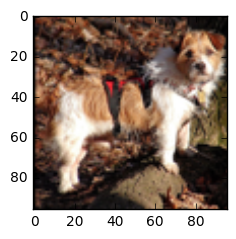

In [18]:
from skimage.io import imread
from skimage.transform import resize
import pylab as pylab
pylab.rcParams['figure.figsize'] = (2.5, 2.5)

n = 50
n = n+1
print n
update = tf.assign(r, np.asarray([X_train[n]]))
#update = tf.assign(r, np.random.rand(1,96,96,3))
sess.run(update)
plt.imshow(X_train[n])
plt.show()

#sty_img = imread("starry_night.jpg")
#xc,yc = 70,
#sty_img = resize(sty_img,(sty_img.shape[0]/2,sty_img.shape[1]/2))[yc:yc+96,xc:xc+96,:]
#plt.imshow(sty_img)
#plt.show()

In [ ]:
img = X_train[n]

vh = sess.run(h_conv2, feed_dict={x:[img], y_:[y_test[n]]})
rareLoss = 0.1*tf.reduce_mean(tf.square(rsty - ssty)) + 0.1*tf.reduce_mean(tf.square(rsty2 - ssty2))

rareTrain = tf.train.GradientDescentOptimizer(0.005).minimize(rareLoss, var_list=[r])


for i in range(50000):
    if i % 1000 == 0:
        print("RareLoss: "+str(sess.run(rareLoss, feed_dict={h: vh, sty: [sty_img]})))
        rimg = sess.run(r)[0]
        
        rimg = np.clip(rimg,0,1)
        update = tf.assign(r, np.asarray([rimg]))
        sess.run(update)
        
        plt.imshow(rimg)
        plt.show()
        
        
        
    rareTrain.run(feed_dict={h: vh, sty:  [sty_img]})

    
rimg = sess.run(r)[0]
plt.imshow(rimg)

In [ ]:
rimg = X_test[4]#sess.run(r)[0]
plt.imshow(rimg, interpolation="none")

In [ ]:
plt.imshow(np.clip(rimg,0,1))

In [ ]:
sess.close()